### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

# ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 2
## Нелинейная регрессия

### Дисциплина: Методы машинного обучения

##### Студент:  Щербак Маргарита Романовна
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант №6

1. Набор данных: wine_quality

2. Независимая переменная: features/chlorides

3. Зависимая переменная: features/alcohol

4. Доп. признак: имеющий максимальную дисперсию

5. Визуализация доп. признака – эмпирическая плотность распределения

6. Показатель качества регрессии – MAE (mean absolute error)

7. Степень полинома: 3

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – сигмоида.

**Задание 1**  
Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения.  

Загрузила набор данных из Tensorflow Datasets

In [ ]:
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

data = tfds.load("wine_quality", split='train')
data


<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

Преобразовала в датафрейм

In [ ]:
data = tfds.as_dataframe(data)


Убрала столбцы, которые содержат текстовую информацию, а также столбцы с небольшим количеством различных значений. Оставила только числовые столбцы с более чем 10 уникальными значениями, а также столбцы с именами x (зависимая переменная) и y (независимая переменная).

In [ ]:
data = data[list(set(data.select_dtypes(exclude='object').columns.to_list() + ['features/chlorides'] + ['features/alcohol']))]
columns_to_keep = [col for col in data.columns if data[col].nunique() > 10]
data = data[columns_to_keep]

In [ ]:
data.head()

,features/density,features/free sulfur dioxide,features/pH,features/fixed acidity,features/residual sugar,features/total sulfur dioxide,features/volatile acidity,features/alcohol,features/sulphates,features/chlorides,features/citric acid
0,1.00080,44.0,3.22,7.6,18.35,197.0,0.32,9.0,0.55,0.054,0.34
1,0.99110,35.0,3.38,6.3,1.20,92.0,0.27,12.2,0.42,0.063,0.49
2,0.99076,6.0,3.51,5.3,1.10,51.0,0.43,11.2,0.48,0.029,0.11
3,0.99672,20.0,3.08,6.6,10.70,103.0,0.41,9.0,0.41,0.110,0.27
4,0.99016,57.0,3.09,5.9,3.80,135.0,0.34,12.0,0.34,0.035,0.30


**Задание 2**  
Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.  

Необходимо удалить точки с выбросами из набора данных на основе стандартизированной оценки Z-score.

In [ ]:
from matplotlib import cm
import pandas as pd

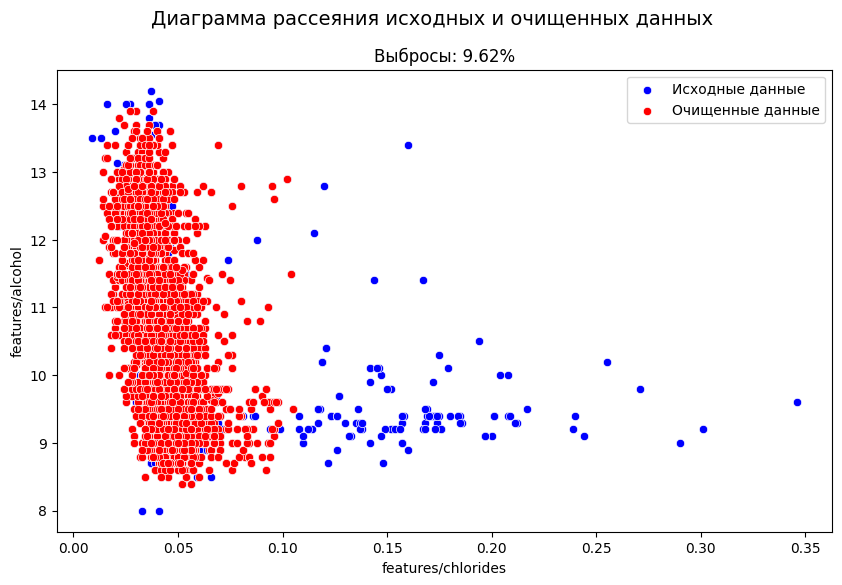

Число точек до удаления: 4898
 После удаления: 4427


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Вычисление Z-оценок для каждой переменной в данных
z_scores = (data - data.mean()) / data.std()
abs_z_scores = np.abs(z_scores)

# Подсчет числа точек до удаления выбросов
num_points_before = len(data)

# Проход по диапазону пороговых значений Z-score
for threshold in np.arange(2.0, 3.5, 0.1):

    # Определение индексов точек, которые находятся за пределами порога Z-score
    outlier_indices = (abs_z_scores > threshold).any(axis=1)

    # Вычисление процента выбросов
    outlier_percentage = sum(outlier_indices) / len(data) * 100

    # Если процент выбросов находится в диапазоне от 5% до 10%, продолжаем
    if 5 <= outlier_percentage <= 10:
        # Очистка данных от выбросов
        cleaned_data = data[~outlier_indices]

        # Подсчет числа точек после удаления выбросов
        num_points_after = len(cleaned_data)

        plt.figure(figsize=(10, 6))

        sns.scatterplot(x='features/chlorides', y='features/alcohol', data=data, label='Исходные данные', color='blue')

        sns.scatterplot(x='features/chlorides', y='features/alcohol', data=cleaned_data, label='Очищенные данные', color='red')
        plt.xlabel('features/chlorides')
        plt.ylabel('features/alcohol')
        plt.title(f'Выбросы: {outlier_percentage:.2f}%', loc='center', fontsize=12)
        plt.suptitle('Диаграмма рассеяния исходных и очищенных данных', fontsize=14)
        plt.legend()
        plt.show()
        print ((f'Число точек до удаления: {num_points_before}\n После удаления: {num_points_after}'))
        break


**Задание 3**  
Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error

n = 3 # Степень полинома
score = mean_absolute_error

Начала с выполнения стандартизации независимого признака и масштабирования зависимого признака на интервал [-1, 1].  
Подготовила данные для моделей: выбрала столбцы с нужными признаками из DataFrame. Затем стандартизировала и масштабировала признаки. Разделила данные на матрицы признаков (X) и целевую переменную (y).

In [ ]:
# Подготовка данных
X = data[['features/chlorides']].values
y = data[['features/alcohol']].values

scaler_X = StandardScaler()
data[['features/chlorides']] = scaler_X.fit_transform(data[['features/chlorides']])
X = data['features/chlorides'].values

scaler_y = MinMaxScaler(feature_range=(-1, 1))
data[['features/alcohol']] = scaler_X.fit_transform(data[['features/alcohol']])
y = data['features/alcohol'].values

In [ ]:
x1 = X.reshape(-1,1)
x2 = np.hstack([x1 ** i for i in range(1, n + 1)])

Создала модель нейронной сети с одним нейроном для линейной регрессии. Компилировала модель, указывая функцию потерь, оптимизатор и метрику.

In [ ]:
# Линейная регрессия
reg1_model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )
reg1_model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)

history1 = reg1_model.fit(x1, y, epochs=100,verbose=None,validation_split = 0.3)

print(f'{score.__name__}', score(y, reg1_model.predict(x1)))

154/154 [==============================] - 0s 1ms/step
mean_absolute_error 0.78601485


Создала модель нейронной сети с одним нейроном для полиномиальной регрессии. Компилировала модель, указывая функцию потерь и оптимизатор.

In [ ]:
# Полиномиальная регрессия
reg2_model = tf.keras.Sequential([
    tf.keras.Input(shape=(3,)),
    tf.keras.layers.Dense(units=1)
])

reg2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history2 = reg2_model.fit(
    x2, y,
    epochs=100,
    verbose=None,
    validation_split = 0.3)

print(f'{score.__name__}', score(y, reg2_model.predict(x2)))

154/154 [==============================] - 0s 1ms/step
mean_absolute_error 0.77309203


**Задание 4**  
Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох на одной визуализации. На визуализации создайте легенду.

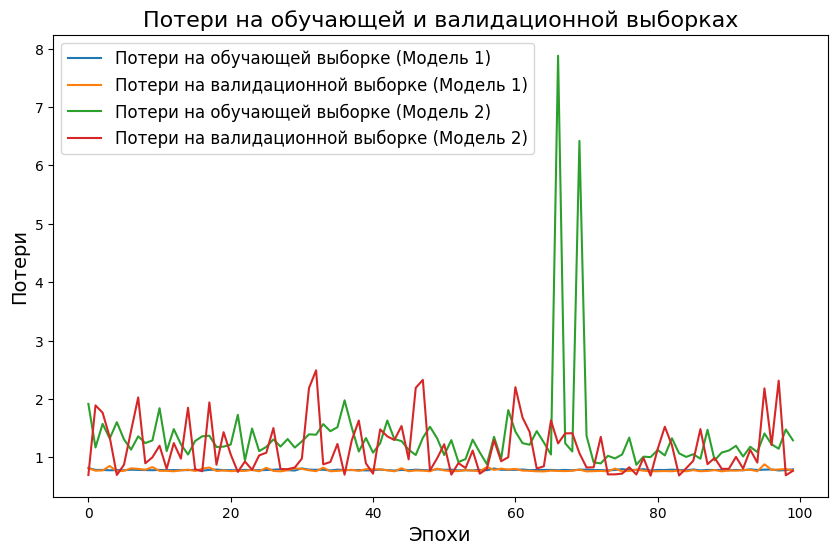

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'], label='Потери на обучающей выборке (Модель 1)')
plt.plot(history1.history['val_loss'], label='Потери на валидационной выборке (Модель 1)')
plt.plot(history2.history['loss'], label='Потери на обучающей выборке (Модель 2)')
plt.plot(history2.history['val_loss'], label='Потери на валидационной выборке (Модель 2)')

plt.title('Потери на обучающей и валидационной выборках', fontsize=16)
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Потери', fontsize=14)
plt.legend(fontsize=12)
plt.show()

**Задание 5**  
Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.  

154/154 [==============================] - 0s 1ms/step


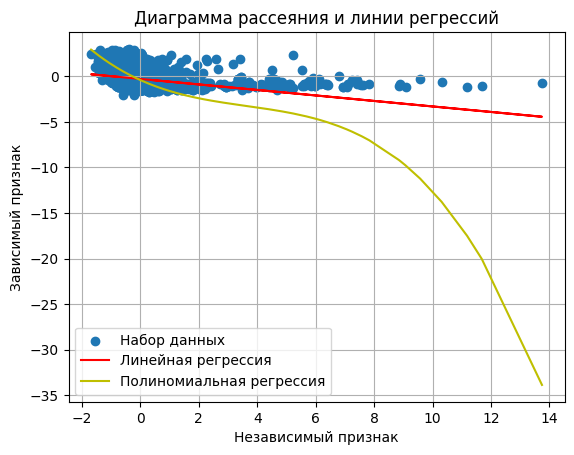

In [ ]:
plt.scatter(X, y, label='Набор данных')
plt.plot(x1, reg1_model.predict(x1), color='r', label='Линейная регрессия')
plt.plot(np.sort(X), reg2_model.predict(x2)[np.argsort(X)], color='y', label='Полиномиальная регрессия')

plt.xlabel('Независимый признак')
plt.ylabel('Зависимый признак')
plt.title('Диаграмма рассеяния и линии регрессий')
plt.legend()
plt.grid()
plt.show()

**Задание 6**  
Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.  

In [ ]:
import numpy as np

# Отбор признаков
columns_to_keep = [col for col in data.columns if data[col].nunique() > 20]
data = data[columns_to_keep]

# Вычисление дисперсии
variances = np.var(data.drop(['features/chlorides'], axis=1), axis=0)

# Определение признака с максимальной дисперсией
max_variance_index = np.argmax(variances)
priznak = data.columns[max_variance_index]

print(f"Признак с максимальной дисперсией: {priznak}")


Признак с максимальной дисперсией: features/total sulfur dioxide


**Задание 7**  
Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.  

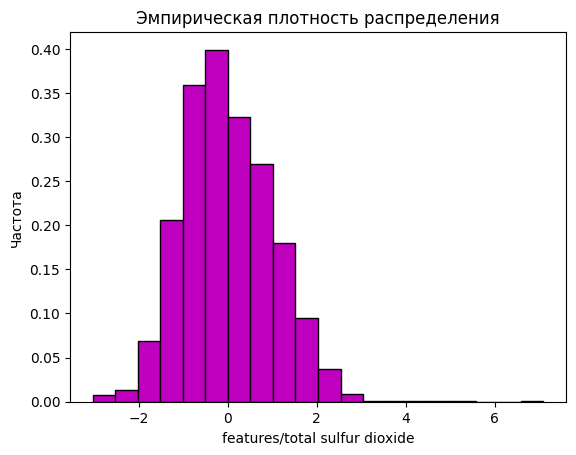

In [ ]:
import matplotlib.pyplot as plt

# Выбор значений выбранного признака
selected_feature_values = data[priznak].values

# Стандартизация признака
scaler_selected_feature = StandardScaler()
data[priznak] = scaler_selected_feature.fit_transform(selected_feature_values.reshape(-1, 1))

# Визуализация распределения
data[priznak].plot.hist(color='m', edgecolor='black', bins=20, density=True)

# Подписи и заголовок
plt.xlabel(f"{priznak}")
plt.ylabel('Частота')
plt.title('Эмпирическая плотность распределения')
plt.show()


**Задание 8**  
Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

In [ ]:
X = data[['features/chlorides','features/alcohol',priznak]].dropna()

y = X['features/alcohol']
X = X[['features/chlorides',priznak]]

In [ ]:
num_hidden_layers = 4 #кол-во скрытых слоев
num_neurons_per_layer = 64 #кол-во нейронов в скрытом слое
activation_function = 'sigmoid' #функция активации

deep_model = tf.keras.Sequential()
for _ in range(num_hidden_layers):
    deep_model.add(tf.keras.layers.Dense(units=num_neurons_per_layer, activation=activation_function))
deep_model.add(tf.keras.layers.Dense(units=1))

deep_model.compile(loss='mse')

history = deep_model.fit(
    X, y,
    epochs=100,
    verbose=False,
    validation_split=0.3)

deep_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                192       
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12737 (49.75 KB)
Trainable params: 12737 (49.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Задание 9**  
Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.

Сначала я извлекла значения признаков и целевого признака из набора данных. Затем создала сетку значений для построения поверхности прогноза. После этого создала объект Figure и объект Axes3D, к которому добавила точки набора данных в виде красных точек и поверхность прогноза.  

82/82 [==============================] - 0s 1ms/step


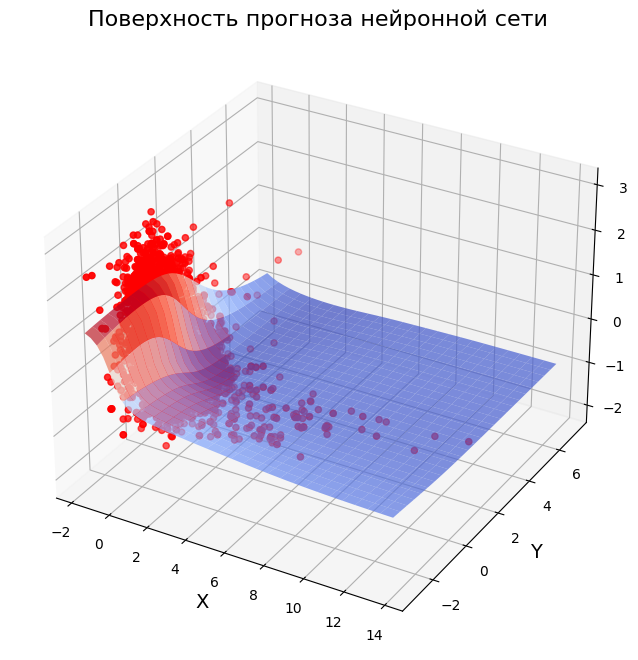

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Извлечение значений признаков и целевого признака из набора данных
xs = X.values[:,0]  # Значения первого признака
ys = X.values[:,1]  # Значения второго признака
zs = y              # Целевой признак

n_plot = 51  # Количество точек для построения поверхности
x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)  # Значения по оси X
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)  # Значения по оси Y
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)  # Сетка значений для построения поверхности
xy_2= np.column_stack([x_mesh.ravel(), y_mesh.ravel()])  # Объединение значений сетки
z_mesh = deep_model.predict(xy_2).reshape(x_mesh.shape)  # Прогноз нейронной сети для сетки

# Создание объекта Figure и объекта Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности прогноза
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap=cm.coolwarm, alpha=0.7)

# Добавление точек набора данных
ax.scatter(xs, ys, zs, color='red')

ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('Z', fontsize=14)
ax.set_title('Поверхность прогноза нейронной сети', fontsize=16)

plt.show()


**Задание 10**  
Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

Функция train_test_split разделяет набор данных на обучающую и тестовую выборки.   
 Args:   
    - X: массив признаков  
    - y: массив отклика   
    - test_ratio: доля тестовой выборки
    - seed: значение для генерации случайных чисел   
  Returns:   
    - X_train: обучающая выборка признаков  
    - X_test: тестовая выборка признаков  
    - y_train: обучающая выборка отклика  
    - y_test: тестовая выборка отклика   

31/31 [==============================] - 0s 1ms/step
--> 11  done
31/31 [==============================] - 0s 1ms/step
--> 311  done
31/31 [==============================] - 0s 1ms/step
--> 611  done
31/31 [==============================] - 0s 1ms/step
--> 911  done
31/31 [==============================] - 0s 1ms/step
--> 1211  done
31/31 [==============================] - 0s 2ms/step
--> 1511  done
31/31 [==============================] - 0s 1ms/step
--> 1811  done
31/31 [==============================] - 0s 1ms/step
--> 2111  done
31/31 [==============================] - 0s 1ms/step
--> 2411  done
31/31 [==============================] - 0s 2ms/step
--> 2711  done
31/31 [==============================] - 0s 1ms/step
--> 3011  done
31/31 [==============================] - 0s 1ms/step
--> 3311  done
31/31 [==============================] - 0s 1ms/step
--> 3611  done
31/31 [==============================] - 0s 2ms/step
--> 3911  done


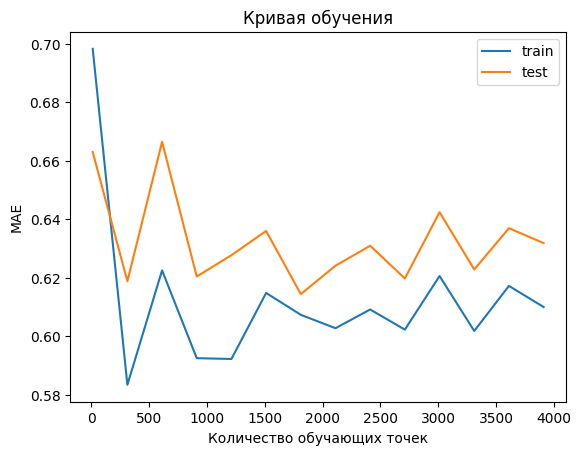

In [ ]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    assert X.shape[0] == y.shape[0], \
        "Размер X не равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"
    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]
    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

# Разбиение набора данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

# Списки для хранения показателей качества на обучающей и тестовой выборках
train_score = []
test_score = []

# Обучение модели на различном количестве обучающих точек
for i in range(11, len(X_train), 300):
    deep_model.compile(loss='mse')
    deep_model.fit(X_train[:i], y_train[:i], epochs=10, verbose=0)

    # Прогнозирование на обучающей выборке и оценка качества
    y_train_predict = deep_model.predict(X_train[:i])
    train_score.append(score(y_train[:i], y_train_predict))

    # Прогнозирование на тестовой выборке и оценка качества
    y_test_predict = deep_model.predict(X_test)
    test_score.append(score(y_test, y_test_predict))
    print('-->', i, ' done')

# Визуализация кривых обучения
plt.plot([i for i in range(11, len(X_train), 300)], train_score, label="train")
plt.plot([i for i in range(11, len(X_train), 300)], test_score, label="test")
plt.title('Кривая обучения')
plt.xlabel('Количество обучающих точек')
plt.ylabel('MAE')
plt.legend()
plt.show()
